In [28]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import Adam
from keras import optimizers

In [29]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

In [30]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [31]:
#for layer in model.layers[:2]:
#    layer.trainable=False
#for layer in model.layers[2:]:
#    layer.trainable=True

for layer in model.layers:
    layer.trainable = True

In [32]:
#train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('./merged_full_split_final/train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_generator = test_datagen.flow_from_directory(
    directory='./merged_full_split_final/val/',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3299 images belonging to 6 classes.
Found 822 images belonging to 6 classes.


In [34]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

# create checkpoints
filepath="./mobilenet_best_models_100_epochs_augmented/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

step_size_train=train_generator.n//train_generator.batch_size
step_size_test=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=100,
                   callbacks=callbacks_list,
                   validation_data=test_generator,
                   validation_steps=step_size_test)

Epoch 1/100
103/103 [==============================] - 59s 577ms/step - loss: 0.9210 - acc: 0.6927 - val_loss: 1.2949 - val_acc: 0.6291

Epoch 00001: val_acc improved from -inf to 0.62911, saving model to ./mobilenet_best_models_100_epochs_augmented/weights-improvement-01-0.63.hdf5
Epoch 2/100
103/103 [==============================] - 45s 438ms/step - loss: 0.7533 - acc: 0.7471 - val_loss: 1.1560 - val_acc: 0.6456

Epoch 00002: val_acc improved from 0.62911 to 0.64557, saving model to ./mobilenet_best_models_100_epochs_augmented/weights-improvement-02-0.65.hdf5
Epoch 3/100
103/103 [==============================] - 49s 472ms/step - loss: 0.7387 - acc: 0.7463 - val_loss: 1.8446 - val_acc: 0.5278

Epoch 00003: val_acc did not improve from 0.64557
Epoch 4/100
103/103 [==============================] - 49s 472ms/step - loss: 0.6194 - acc: 0.7912 - val_loss: 0.5200 - val_acc: 0.8152

Epoch 00004: val_acc improved from 0.64557 to 0.81519, saving model to ./mobilenet_best_models_100_epochs_a

In [35]:
model.save("100augmented.h5")

In [36]:
print(history.history.keys())
plt.figure(1)  

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

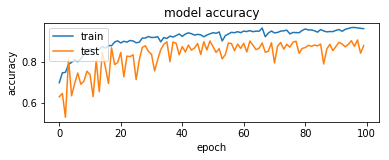

In [37]:
 # summarize history for accuracy
    
 plt.subplot(211)  
 plt.plot(history.history['acc'])  
 plt.plot(history.history['val_acc'])  
 plt.title('model accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.savefig('./graphs/model_accuracy.png')

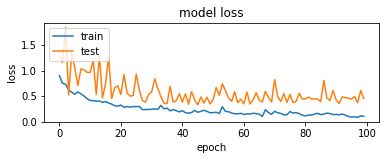

In [38]:
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title('model loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.savefig('./graphs/model_loss.png')